In [1]:
# 引用需要的library
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from matplotlib import pyplot as plt
import helper
import joblib
import os
import jieba
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import plot_tree

c:\Users\gh\anaconda3\Lib\site-packages\dask\dataframe\_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(


In [2]:
# 从文本文件中读数据
# 读取到的内容
# X=评论（string）， y=情感分类（0/1）
folder_path = './user_comments'  # 请将此处替换为您的文件夹路径
X = []
y = []
# 使用CountVectorizer进行文本向量化
vectorizer = CountVectorizer()
for root, dirs, files in os.walk(folder_path):
    for dir in dirs:
        if dir == 'neg':
            label = 0
        elif dir == 'pos':
            label = 1
        else:
            continue
        for file in os.listdir(os.path.join(folder_path, dir)):
            if file.endswith('.txt'):
                file_path = os.path.join(folder_path, dir, file)
                with open(file_path, 'r', encoding='gb2312',errors='ignore') as f:
                    content = f.read()
                    content = content.strip().replace(" ", "").replace('\n', '').replace('\t', '')
                    if content == "": break
                # 使用jieba进行分词
                words = ' '.join(jieba.cut(content))
                X.append(words)
                y.append(label)

X=np.array(X)
y=np.array(y)
# print(X.shape)
# (4905,)

# 文本向量化
X = vectorizer.fit_transform(X)

# 打印转化为词向量的X数据，是一个稀疏的矩阵(4905, 18300)
# print(X.toarray())
# print(X.shape)

voca = vectorizer.vocabulary_
print(voca)
# vocabulary dict

# 对dict重新排序，按照value的顺序打印dict
voca=sorted(voca.items(), key=lambda x: x[1])
for item in voca:
    print(item)





X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\gh\AppData\Local\Temp\jieba.cache
Loading model cost 0.317 seconds.
Prefix dict has been built successfully.


{'标准间': 9940, '房间': 8005, '不如': 1334, '而且': 13028, '设施': 13917, '非常': 15648, '陈旧': 15466, '建议': 7178, '酒店': 15071, '改善': 8778, '服务态度': 9664, '极其': 9853, '前台': 3660, '接待': 8542, '好象': 6051, '没有': 10580, '受过': 4346, '培训': 5350, '基本': 5354, '礼貌': 12201, '竟然': 12407, '同时': 4640, '几个': 3354, '客人': 6281, '大堂': 5623, '副理': 3701, '辩解': 14535, '没完': 10558, '总经理': 7681, '电话': 11715, '投诉': 8214, '不敢': 1391, '要是': 13738, '什么': 2273, '亏心事': 2070, '跟本': 14350, '不用': 1429, '这么': 14673, '地理位置': 5252, '不错': 1516, '哪里': 4910, '比较': 10284, '方便': 9012, '但是': 2525, '服务': 9655, '象是': 14110, '豪生': 14120, '集团': 15580, '管理': 12550, '下午': 1172, '一觉': 929, '一个': 668, '本来': 9749, '打扫': 8101, '一下': 658, '所以': 8011, '打开': 8098, '可是': 4489, '晚上': 9376, '发现': 4292, '关掉': 3111, '还是': 14647, '马路': 15948, '房间内': 8006, '简陋': 12525, '并且': 7004, '玻璃窗': 11552, '户外': 7960, '还有': 14648, '一层': 784, '幕墙': 6939, '玻璃': 11548, '不能': 1453, '导致': 6424, '自然通风': 13227, '采光': 15104, '不好': 1331, '三顿': 1082, '早餐': 9201, '品种': 4877, '少得':

In [ ]:
# 调用jieba分词
# 文本向量化：1. 类one-hot编码 2. count思想 3. tf-idf思想
# 返回 X=评论向量（list），y=情感分类（0/1）

In [ ]:
# 切分数据集为X_train, y_train, X_test, y_test


In [ ]:
# 数据预处理：标准化/归一化
# 稀疏矩阵降维：PCA, 低优先级

[Text(0.5, 0.8333333333333334, 'x[1516] <= 0.5\ngini = 0.408\nsamples = 3399\nvalue = [971, 2428]'),
 Text(0.25, 0.5, 'x[10580] <= 0.5\ngini = 0.488\nsamples = 2115\nvalue = [895, 1220]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.449\nsamples = 1550\nvalue = [528, 1022]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.455\nsamples = 565\nvalue = [367, 198]'),
 Text(0.75, 0.5, 'x[7895] <= 4.5\ngini = 0.111\nsamples = 1284\nvalue = [76, 1208]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.095\nsamples = 1263\nvalue = [63, 1200]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.472\nsamples = 21\nvalue = [13, 8]')]

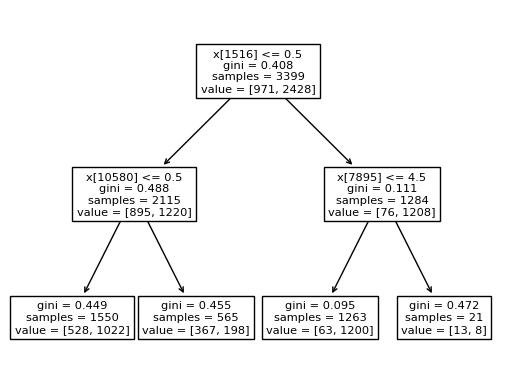

In [3]:
# 调用各分类模型，训练
# KNeighborsClassifier
# DecisionTreeClassifier
# 构建一个模型
model = DecisionTreeClassifier(max_depth=2)

# 训练模型
model.fit(X=X_train, y=y_train)
# 绘制训练好的决策树
plot_tree(model)

# SVC
# RandomForestClassifier
# AdaBoostClassifier
# GradientBoostingClassifier
# XGBClassifier
# LGBMClassifier

In [4]:
# 调用训练完毕的模型，做预测
y_pred = model.predict(X_test)

In [5]:
# 计算各模型的acc，训练时间，预测时间
acc = (y_pred == y_test).mean()
print(acc)

0.7364705882352941


In [40]:
# 保存模型到models文件夹
joblib.dump(value=model, filename="./models/decisiontree.model")

['./models/decisiontree.model']

In [49]:
predict_model = joblib.load("./models/decisiontree.model")
y_result = predict_model.predict(X_test[20])
print(y_result)

[0]


In [ ]:
# Precision-Recall Curve
# 柱状图，能够一眼看出各数据的大小，比较数据之间的差别